<a href="https://colab.research.google.com/github/terapyo1304/CVPR-lab-sem-6/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files



In [2]:
uploaded=files.upload()

Saving king.jpeg to king.jpeg


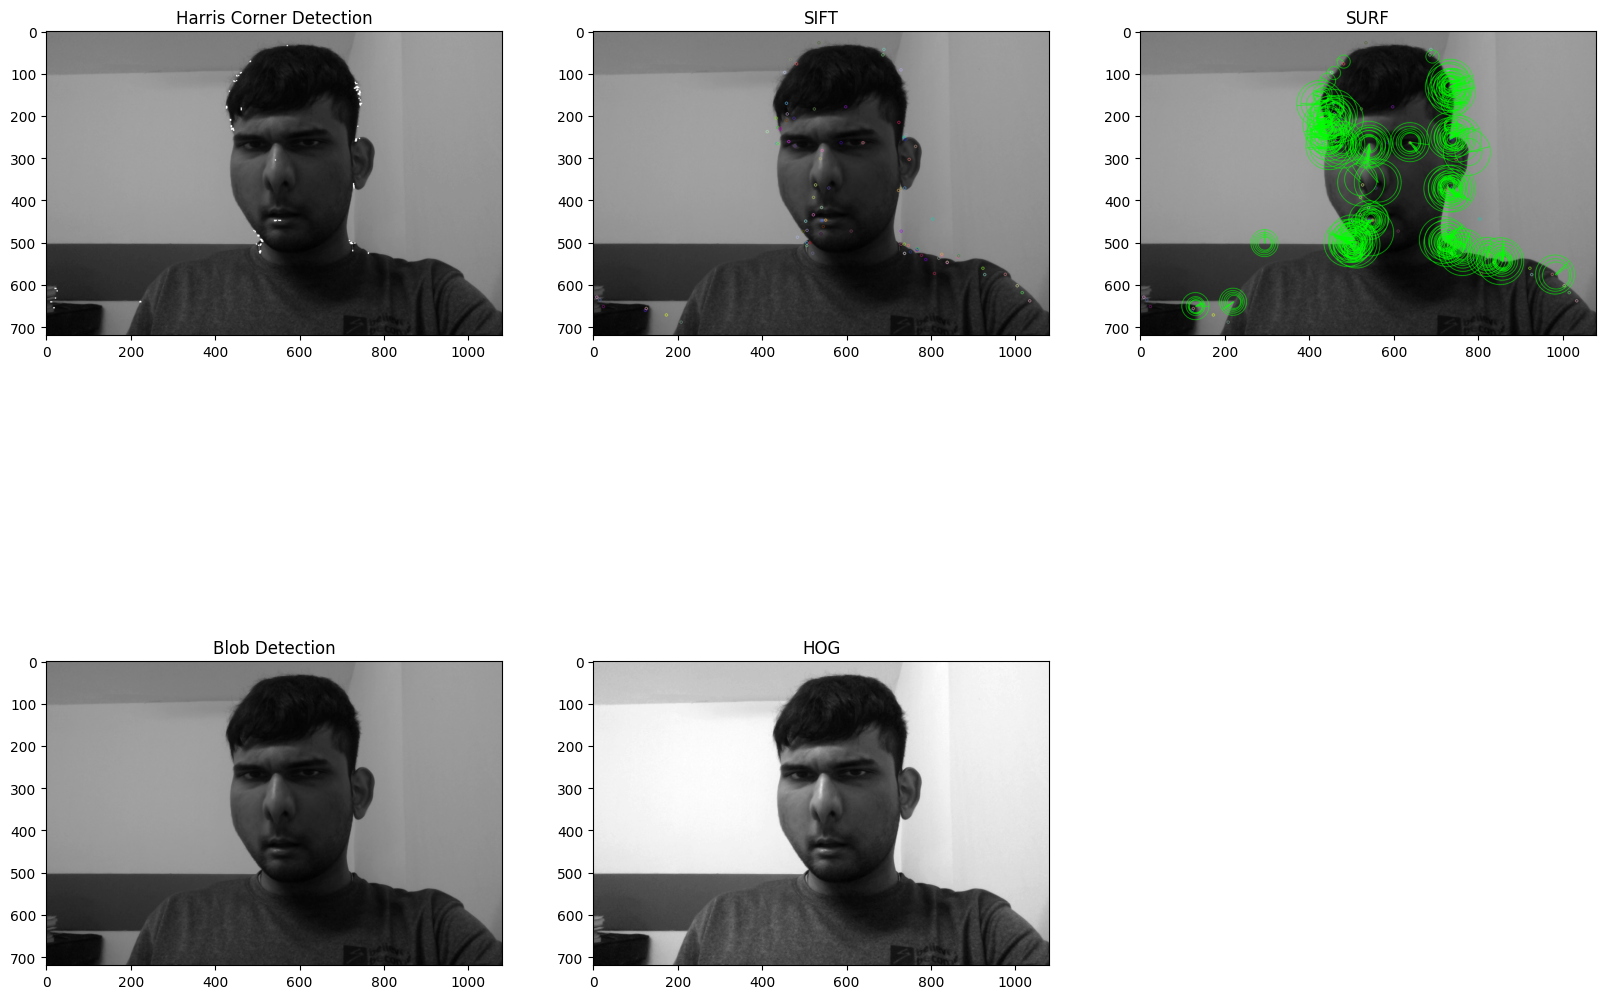

In [3]:

# Load the image
img = cv2.imread('king.jpeg')
image = cv2.imread('king.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Harris Corner Detection
harris_corners = cv2.cornerHarris(image, 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)
image_with_harris_corners = image.copy()
image_with_harris_corners[harris_corners > 0.01 * harris_corners.max()] = 255

# 2. SIFT
sift = cv2.SIFT_create()
kp = sift.detect(image,None)
sifted_image =cv2.drawKeypoints(image,kp,img)


# 3. ORB (Alternative to SURF)
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(image, None)
image_with_keypoints_orb = cv2.drawKeypoints(img, keypoints_orb, None, (0, 255, 0), 4)

# 4. Blob Detection
blob_detector = cv2.SimpleBlobDetector_create()
keypoints_blob = blob_detector.detect(image)
image_with_blobs = cv2.drawKeypoints(image, keypoints_blob, np.array([]), (0, 0, 255),
                                     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 5. HOG (Histogram of Oriented Gradients)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
rects, _ = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)
image_with_hog = image.copy()
for (x, y, w, h) in rects:
    cv2.rectangle(image_with_hog, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Plotting the results
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
plt.title('Harris Corner Detection')
plt.imshow(image_with_harris_corners, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('SIFT')
plt.imshow(cv2.cvtColor(sifted_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.title('SURF')
plt.imshow(cv2.cvtColor(image_with_keypoints_orb, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title('Blob Detection')
plt.imshow(image_with_blobs, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('HOG')
plt.imshow(image_with_hog, cmap='gray')

plt.show()